In [1]:
# Importing the Necessary Libraries 
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input
from tensorflow.keras.models import load_model
from google.colab import drive
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

In [2]:
# Connecting to Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Loading the Weights of the CNN Model with FC Layers 
network = load_model('/content/drive/MyDrive/Papers/Pneumonia_CAD/Primary Material/Results/Pneumonia_Paper/ChestVGG_SGD.h5')

In [4]:
# Checking the Layer We Want to Use (Flattening Layer)
network.layers[41].output

<KerasTensor: shape=(None, 50176) dtype=float32 (created by layer 'flatten')>

In [5]:
# Loading the CNN Model with Layer 41 (Flattening Layer) 
model = Model(inputs=network.input, outputs=network.layers[41].output)

In [6]:
# Defining the Test Path
test_path = '/content/drive/MyDrive/Papers/Pneumonia_CAD/Primary Material/Dataset/test'

In [7]:
# The Settings for Generating the Test Set  
test_datagen = ImageDataGenerator(
    rescale=1./255)

In [8]:
# Generating the Test Set 
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            shuffle=False,
                                            batch_size=1,
                                            class_mode = 'categorical')

Found 1170 images belonging to 2 classes.


In [9]:
# Getting the Outputs of Layer 41 (Flattening Layer) as the Input of Machine Learning (ML) Classifiers for Test
features_test=model.predict(test_set, steps=1170, verbose=1)

1170/1170 [==============================] - 285s 235ms/step


In [10]:
# Load The Training Features from Google Drive (Saved Before)
features_train=np.load("/content/drive/MyDrive/Papers/Pneumonia_CAD/Primary Material/Results/Pneumonia_Paper/Features_Flattened.npy")

In [11]:
# Load The Training Classes from Google Drive (Saved Before)
classes_train=np.load("/content/drive/MyDrive/Papers/Pneumonia_CAD/Primary Material/Results/Pneumonia_Paper/Classes.npy")

In [12]:
# Concatenating All the Features
features_final=np.concatenate((features_train, features_test))

In [13]:
# Concatenating All the Classes
classes_final=np.concatenate((classes_train, test_set.classes))

In [14]:
# Creating Cross-Validation Sets
from sklearn.model_selection import KFold
skf = KFold(n_splits=6)

In [ ]:
# Creating Linear Support Vector Machine (SVM) Classifier
from sklearn.svm import LinearSVC
svc_linear=LinearSVC(C=1, dual=False, max_iter=6000)
predicted_y = []
expected_y = []
for train_index, test_index in skf.split(features_final, classes_final):
    x_train, x_test = features_final[train_index], features_final[test_index]
    y_train, y_test = classes_final[train_index], classes_final[test_index]
    model_svc_linear=svc_linear.fit(x_train, y_train)
    predicted_y = np.append(predicted_y, model_svc_linear.predict(x_test))
    expected_y=np.append(expected_y, y_test)
scores = cross_val_score(svc_linear, features_final, classes_final, cv=6)
print("The mean of accuracies for linear SVM classifier is:", scores.mean())

The mean of accuracies for linear SVM classifier is: 0.9808743169398908


0.9795081967213115

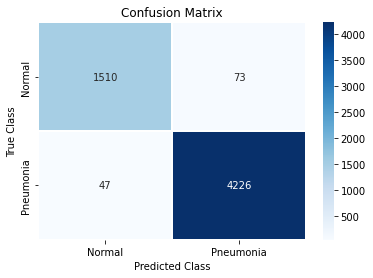

In [ ]:
# Creating Confusion Matrix For Linear SVM Classifier
cf_matrix_svm_linear=confusion_matrix(expected_y, predicted_y)
ax=plt.subplot()
sns.heatmap(cf_matrix_svm_linear, cmap='Blues', annot=True, linewidths=1, fmt = 'd', ax=ax)
ax.set_xlabel('Predicted Class');ax.set_ylabel('True Class')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Normal', 'Pneumonia']); ax.yaxis.set_ticklabels(['Normal', 'Pneumonia'])
accuracy_score(expected_y, predicted_y)

In [ ]:
# Creating Radial Basis Function (RBF) SVM Classifier
from sklearn import svm
svc_rbf = svm.SVC(C=1, kernel='rbf', max_iter=6000)
predicted_y = []
expected_y = []
for train_index, test_index in skf.split(features_final, classes_final):
    x_train, x_test = features_final[train_index], features_final[test_index]
    y_train, y_test = classes_final[train_index], classes_final[test_index]
    model_svc_rbf=svc_rbf.fit(x_train, y_train)
    predicted_y = np.append(predicted_y, model_svc_rbf.predict(x_test))
    expected_y=np.append(expected_y, y_test)
scores = cross_val_score(svc_rbf, features_final, classes_final, cv=6)
print("The mean of accuracies for RBF-SVM classifier is:", scores.mean())

The mean of accuracies for RBF-SVM classifier is: 0.9849726775956285


0.9820696721311475

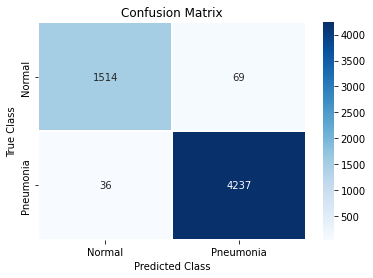

In [ ]:
# Creating Confusion Matrix for RBF-SVM Classifier
cf_matrix_svm_rbf=confusion_matrix(expected_y, predicted_y)
ax=plt.subplot()
sns.heatmap(cf_matrix_svm_rbf, cmap='Blues', annot=True, linewidths=1, fmt = 'd', ax=ax)
ax.set_xlabel('Predicted Class');ax.set_ylabel('True Class')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Normal', 'Pneumonia']); ax.yaxis.set_ticklabels(['Normal', 'Pneumonia'])
accuracy_score(expected_y, predicted_y)

In [ ]:
# Creating Polynomial SVM Classifier
svc_pol = svm.SVC(C=1, kernel='poly', max_iter=6000)
model_svc_pol=svc_pol.fit(x_train, y_train)
predicted_y = []
expected_y = []
for train_index, test_index in skf.split(features_final, classes_final):
    x_train, x_test = features_final[train_index], features_final[test_index]
    y_train, y_test = classes_final[train_index], classes_final[test_index]
    model_svc_pol=svc_rbf.fit(x_train, y_train)
    predicted_y = np.append(predicted_y, model_svc_pol.predict(x_test))
    expected_y=np.append(expected_y, y_test)
scores = cross_val_score(svc_pol, features_final, classes_final, cv=6)
print("The mean of accuracies for polynomial SVM classifier is:", scores.mean())

The mean of accuracies for polynomial SVM classifier is: 0.983948087431694


0.9820696721311475

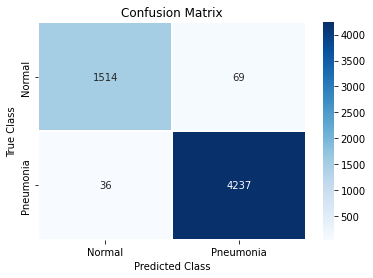

In [ ]:
# Creating Confusion Matrix for Polynomial SVM Classifier
cf_matrix_svc_pol=confusion_matrix(expected_y, predicted_y)
ax=plt.subplot()
sns.heatmap(cf_matrix_svc_pol, cmap='Blues', annot=True, linewidths=1, fmt = 'd', ax=ax)
ax.set_xlabel('Predicted Class');ax.set_ylabel('True Class')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Normal', 'Pneumonia']); ax.yaxis.set_ticklabels(['Normal', 'Pneumonia'])
accuracy_score(expected_y, predicted_y)

In [ ]:
# Creating Random Forest (RF) Classifier Classifier
from sklearn.ensemble import RandomForestClassifier
random_forest=RandomForestClassifier(random_state=0)
predicted_y = []
expected_y = []
for train_index, test_index in skf.split(features_final, classes_final):
    x_train, x_test = features_final[train_index], features_final[test_index]
    y_train, y_test = classes_final[train_index], classes_final[test_index]
    model_rf=random_forest.fit(x_train, y_train)
    predicted_y = np.append(predicted_y, model_rf.predict(x_test))
    expected_y=np.append(expected_y, y_test)
scores = cross_val_score(random_forest, features_final, classes_final, cv=6)
print("The mean of accuracies for RF classifier is:", scores.mean())

The mean of accuracies for RF classifier is: 0.9779713114754097


0.9706284153005464

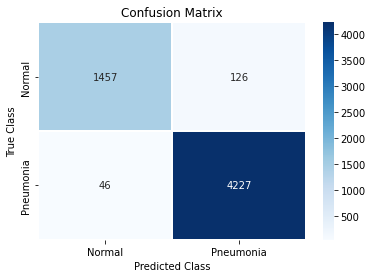

In [ ]:
# Creating Confusion Matrix for RF Classifier
cf_matrix_rf=confusion_matrix(expected_y, predicted_y)
ax=plt.subplot()
sns.heatmap(cf_matrix_rf, cmap='Blues', annot=True, linewidths=1, fmt = 'd', ax=ax)
ax.set_xlabel('Predicted Class');ax.set_ylabel('True Class')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Normal', 'Pneumonia']); ax.yaxis.set_ticklabels(['Normal', 'Pneumonia'])
accuracy_score(expected_y, predicted_y)

In [ ]:
# Creating Logistic Regression (LR) Classifier
from sklearn.linear_model import LogisticRegression
logit=LogisticRegression(max_iter=6000)
predicted_y = []
expected_y = []
for train_index, test_index in skf.split(features_final, classes_final):
    x_train, x_test = features_final[train_index], features_final[test_index]
    y_train, y_test = classes_final[train_index], classes_final[test_index]
    model_lr=logit.fit(x_train, y_train)
    predicted_y = np.append(predicted_y, model_lr.predict(x_test))
    expected_y=np.append(expected_y, y_test)
scores = cross_val_score(logit, features_final, classes_final, cv=6)
print("The mean of accuracies for LR classifier is:", scores.mean())

The mean of accuracies for LR classifier is: 0.983094262295082


0.9807035519125683

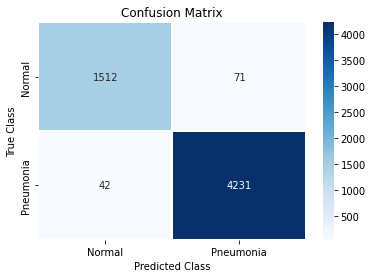

In [ ]:
# Creating Confusion Matrix for LR Classifier
cf_matrix_lr=confusion_matrix(expected_y, predicted_y)
ax=plt.subplot()
sns.heatmap(cf_matrix_lr, cmap='Blues', annot=True, linewidths=1, fmt = 'd', ax=ax)
ax.set_xlabel('Predicted Class');ax.set_ylabel('True Class')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Normal', 'Pneumonia']); ax.yaxis.set_ticklabels(['Normal', 'Pneumonia'])
accuracy_score(expected_y, predicted_y)

In [ ]:
# Creating Gaussian Naive Bayes (NB) Classifier
from sklearn.naive_bayes import GaussianNB
classifier_nb=GaussianNB(priors=[0.5, 0.5])
predicted_y = []
expected_y = []
for train_index, test_index in skf.split(features_final, classes_final):
    x_train, x_test = features_final[train_index], features_final[test_index]
    y_train, y_test = classes_final[train_index], classes_final[test_index]
    model_nb=classifier_nb.fit(x_train, y_train)
    predicted_y = np.append(predicted_y, model_nb.predict(x_test))
    expected_y=np.append(expected_y, y_test)
scores = cross_val_score(classifier_nb, features_final, classes_final, cv=6)
print("The mean of accuracies for NB classifier is:", scores.mean())

The mean of accuracies for NB classifier is: 0.9193989071038251


0.8903688524590164

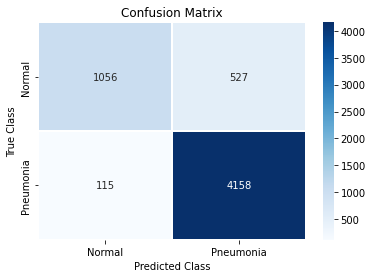

In [ ]:
# Creating Confusion Matrix for Gaussian NB Classifier
cf_matrix_nb=confusion_matrix(expected_y, predicted_y)
ax=plt.subplot()
sns.heatmap(cf_matrix_nb, cmap='Blues', annot=True, linewidths=1, fmt = 'd', ax=ax)
ax.set_xlabel('Predicted Class');ax.set_ylabel('True Class')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Normal', 'Pneumonia']); ax.yaxis.set_ticklabels(['Normal', 'Pneumonia'])
accuracy_score(expected_y, predicted_y)

In [15]:
# Creating K-Nearest Neighbors Classifier (The optimal K was calculated using different values in range [3,30])
from sklearn.neighbors import KNeighborsClassifier
knn_optimized=KNeighborsClassifier(n_neighbors=11)
predicted_y = []
expected_y = []
for train_index, test_index in skf.split(features_final, classes_final):
    x_train, x_test = features_final[train_index], features_final[test_index]
    y_train, y_test = classes_final[train_index], classes_final[test_index]
    model_knn=knn_optimized.fit(x_train, y_train)
    predicted_y = np.append(predicted_y, model_knn.predict(x_test))
    expected_y=np.append(expected_y, y_test)
scores = cross_val_score(knn_optimized, features_final, classes_final, cv=6)
print("The mean of accuracies for KNN classifier is:", scores.mean())

The mean of accuracies for KNN classifier is: 0.9834357923497268


In [ ]:
scores

0.9788251366120219

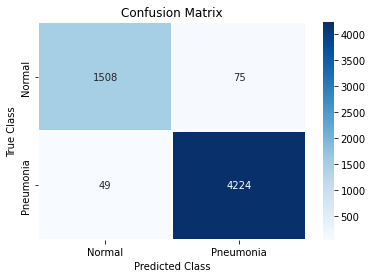

In [16]:
# Creating Confusion Matrix for KNN Classifier
cf_matrix_knn=confusion_matrix(expected_y, predicted_y)
ax=plt.subplot()
sns.heatmap(cf_matrix_knn, cmap='Blues', annot=True, linewidths=1, fmt = 'd', ax=ax)
ax.set_xlabel('Predicted Class');ax.set_ylabel('True Class')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Normal', 'Pneumonia']); ax.yaxis.set_ticklabels(['Normal', 'Pneumonia'])
accuracy_score(expected_y, predicted_y)

In [ ]:
# Creating K-Nearest Neighbors Classifier (The optimal K was calculated using different values in range [3,30])
from sklearn.neighbors import KNeighborsClassifier
knn_optimized=KNeighborsClassifier(n_neighbors=21)
predicted_y = []
expected_y = []
for train_index, test_index in skf.split(features_final, classes_final):
    x_train, x_test = features_final[train_index], features_final[test_index]
    y_train, y_test = classes_final[train_index], classes_final[test_index]
    model_knn=knn_optimized.fit(x_train, y_train)
    predicted_y = np.append(predicted_y, model_knn.predict(x_test))
    expected_y=np.append(expected_y, y_test)
scores = cross_val_score(knn_optimized, features_final, classes_final, cv=6)
print("The mean of accuracies for KNN classifier is:", scores.mean())

The mean of accuracies for KNN classifier is: 0.9837773224043715


In [ ]:
scores

0.9769467213114754

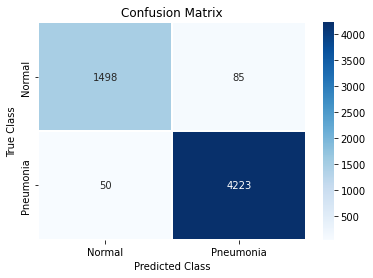

In [ ]:
# Creating Confusion Matrix for KNN Classifier
cf_matrix_knn=confusion_matrix(expected_y, predicted_y)
ax=plt.subplot()
sns.heatmap(cf_matrix_knn, cmap='Blues', annot=True, linewidths=1, fmt = 'd', ax=ax)
ax.set_xlabel('Predicted Class');ax.set_ylabel('True Class')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Normal', 'Pneumonia']); ax.yaxis.set_ticklabels(['Normal', 'Pneumonia'])
accuracy_score(expected_y, predicted_y)